### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=18,6
import os
from datetime import timedelta


# read data files

In [3]:
# csv data files
raw_data = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL.xlsx")
df_consumer  =pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL Jamia data.xlsx")
df_daily0 = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL-prepaid_data_daily_log_grid (1).xlsx")
df_daily1 = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL-prepaid_data_daily_log_grid.xlsx")


## high tention data(main meter)

In [4]:

columns = ['creation_time', 'R_Voltage', 'Y_Voltage', 'B_Voltage', 'R_Current', 'Y_Current',
            'B_Current', 'A', 'BlockEnergy-WhExp', 'B', 'C', 'D', 'BlockEnergy-VAhExp',
            'KWh', 'BlockEnergy-VArhQ1', 'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp']

main_df = raw_data.iloc[:, 0].str.split(',', expand=True)
main_df.columns = columns  # Assign column names
df = main_df.drop([
    'BlockEnergy-WhExp', 'A', 'B', 'C', 'D', 'BlockEnergy-VAhExp', 'BlockEnergy-VAhExp', 'BlockEnergy-VArhQ1',
    'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp'], axis=1)
pd.set_option('display.max_columns', None)

df['creation_time'] = pd.to_datetime(df['creation_time'])
df['KWh'] = df['KWh'].astype(float)/1000
df['R_Voltage'] = df['R_Voltage'].astype(float)
df['Y_Voltage'] = df['Y_Voltage'].astype(float)
df['B_Voltage'] = df['B_Voltage'].astype(float)
df['R_Current'] = df['R_Current'].astype(float)
df['Y_Current'] = df['Y_Current'].astype(float)
df['B_Current'] = df['B_Current'].astype(float)
# print(df.tail())
df.set_index("creation_time",drop=True,inplace=True)
ht_df_daily = df[["KWh"]].resample(rule="1h").sum()
ht_df_daily.rename(columns={"KWh": "HT"}, inplace=True)
print(f"null values in ht_df_daily: {ht_df_daily.isna().sum()}")
ht_df_daily

null values in ht_df_daily: HT    0
dtype: int64


,HT
creation_time,
2022-12-12 00:00:00,33.3
2022-12-12 01:00:00,61.6
2022-12-12 02:00:00,54.9
2022-12-12 03:00:00,54.2
2022-12-12 04:00:00,52.8
...,...
2024-11-16 20:00:00,107.5
2024-11-16 21:00:00,106.2
2024-11-16 22:00:00,165.5


# consumer_data (multiple meter )


In [6]:
df_daily = pd.concat([df_daily0,df_daily1])
df_daily['log_date'] = pd.to_datetime(df_daily['log_date']).dt.floor('D')
df_daily.set_index("log_date",drop=True,inplace=True)
df_daily = df_daily.drop(index=pd.Timestamp("2024-11-19"))  # Use pd.Timestamp to ensure compatibility
df_daily['daily_consumption'] = round(df_daily.iloc[:,1:25].sum(axis=1),2)
df_daily

,location_id,grid_unit_00,grid_unit_01,grid_unit_02,grid_unit_03,grid_unit_04,grid_unit_05,grid_unit_06,grid_unit_07,grid_unit_08,grid_unit_09,grid_unit_10,grid_unit_11,grid_unit_12,grid_unit_13,grid_unit_14,grid_unit_15,grid_unit_16,grid_unit_17,grid_unit_18,grid_unit_19,grid_unit_20,grid_unit_21,grid_unit_22,grid_unit_23,unit_grid_opening,unit_grid_closing,daily_consumption
log_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3354.82,3359.0,4.18
2023-01-02,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3359.00,3362.0,3.00
2023-01-03,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3362.00,3364.0,2.00
2023-01-04,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3364.00,3366.0,2.00
2023-01-05,100010010101,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3366.00,3370.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14,100010020908,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4529.00,4533.0,4.00
2024-11-15,100010020908,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4533.00,4537.0,4.00
2024-11-16,100010020908,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4537.00,4539.0,2.00


In [7]:
data_lst = []
for datee in df_daily.index.unique():
    daily_consumption = round(sum(dict(df_daily.iloc[df_daily.index == datee ,1:25].sum()).values()),2)
    for k,d in dict(df_daily.iloc[df_daily.index == datee ,1:25].sum()).items():
    # data_lst.append((datee+timedelta(hours = int(k.split("_")[2])),round(d,2)))
        data_lst.append((datee+timedelta(hours = int(k.split("_")[2])),round(d,2),daily_consumption))

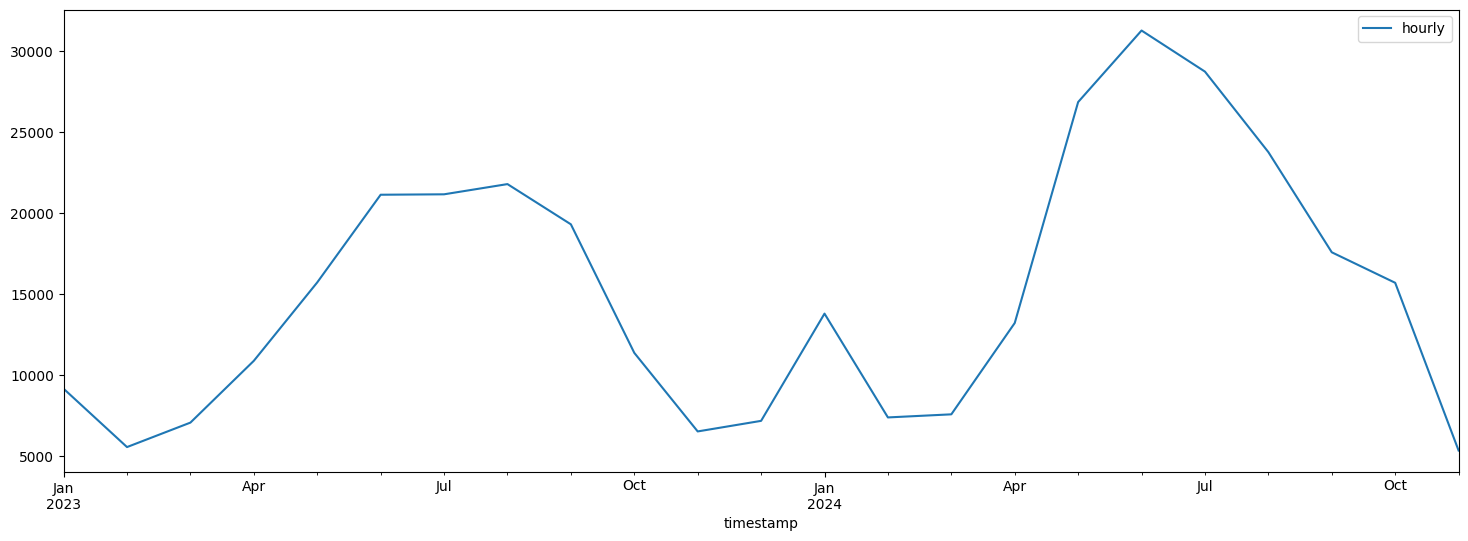

,hourly,daily,monthly
timestamp,,,
2023-01-01 00:00:00,2.28,204.22,9162.32
2023-01-01 01:00:00,2.47,204.22,9162.32
2023-01-01 02:00:00,0.47,204.22,9162.32
2023-01-01 03:00:00,3.21,204.22,9162.32
2023-01-01 04:00:00,0.55,204.22,9162.32
...,...,...,...
2024-11-18 19:00:00,11.00,237.00,5345.00
2024-11-18 20:00:00,9.00,237.00,5345.00
2024-11-18 21:00:00,9.00,237.00,5345.00


In [100]:
df = pd.DataFrame(data_lst,columns=['timestamp',"hourly","daily"])
df.set_index("timestamp",drop=True, inplace=True)
df_monthly = df[['hourly']].resample(rule="1ME").sum()
df_monthly.plot()
plt.show()  
for y in df.index.year.unique():
    for m in df_monthly.loc[df_monthly.index.year == y].index.month:
        # Get the monthly value
        monthly_value = df_monthly.loc[(df_monthly.index.year == y) & (df_monthly.index.month == m)].iloc[0, 0]
        # print(y,m,monthly_value)
        df.loc[(df.index.year == y) & (df.index.month == m), 'monthly'] = monthly_value

# daily_data_aligned = df.align(df_monthly, axis=0)[0]  # Align indices
df


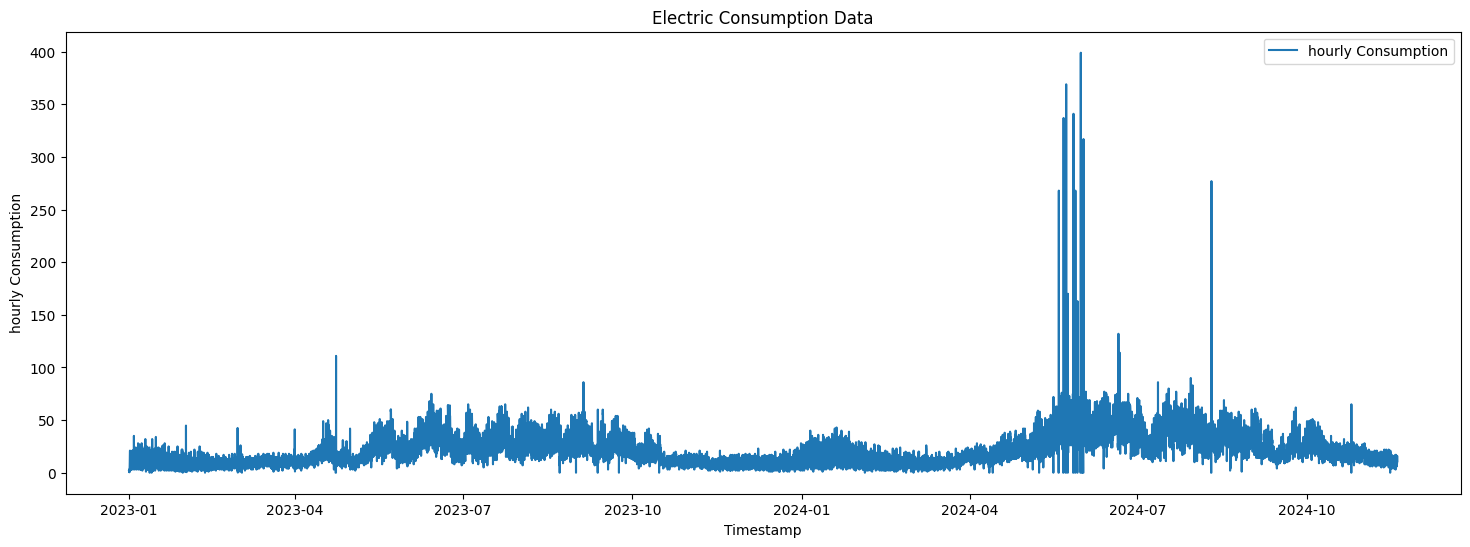

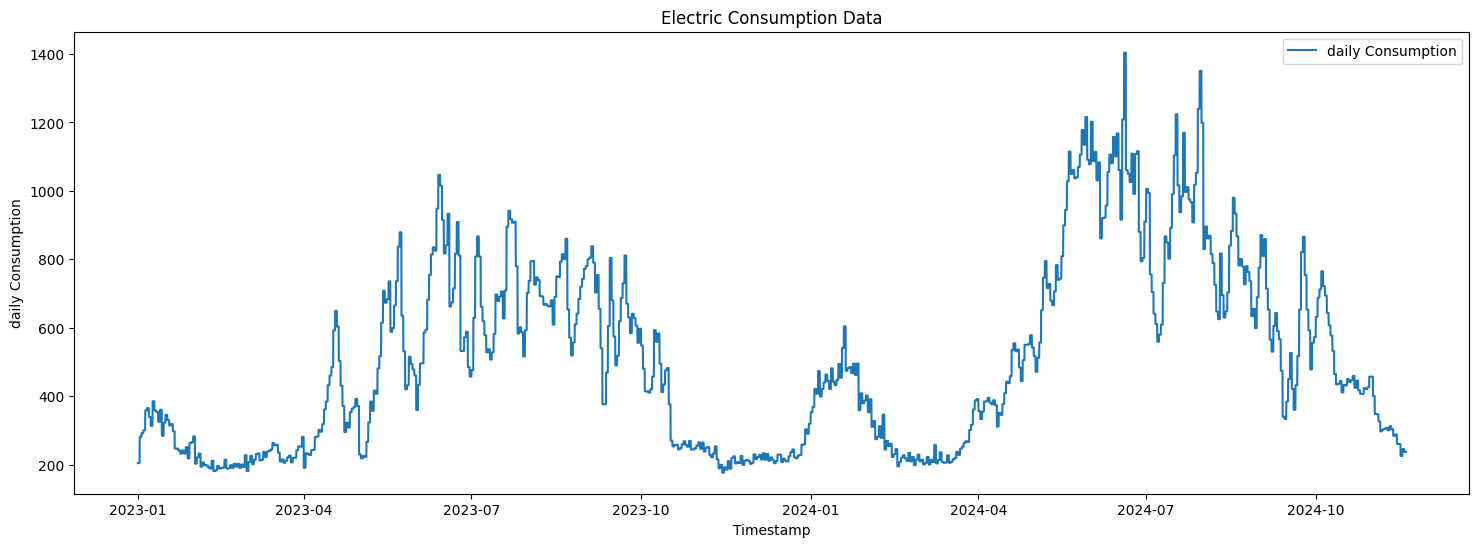

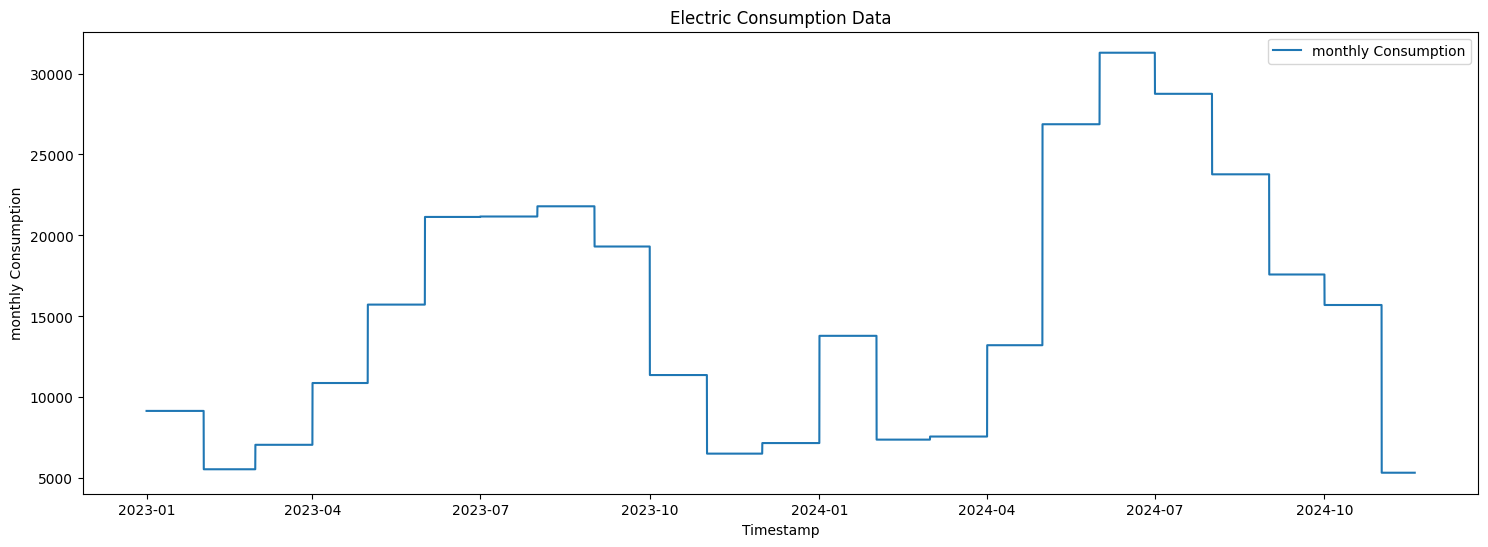

In [101]:
for col in df.columns:
    plt.plot(df.index, df[col], label=f'{col} Consumption')
    plt.legend()
    plt.title('Electric Consumption Data')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{col} Consumption')
    plt.show()


In [102]:
consumer_df = df.copy()
consumer_df['hourly_to_daily_ratio'] = consumer_df['hourly'] / consumer_df['daily']
consumer_df['hourly_to_monthly_ratio'] = consumer_df['hourly'] / consumer_df['monthly']
consumer_df['daily_to_monthly_ratio'] = consumer_df['daily'] / consumer_df['monthly']
consumer_df

,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio
timestamp,,,,,,
2023-01-01 00:00:00,2.28,204.22,9162.32,0.011164,0.000249,0.022289
2023-01-01 01:00:00,2.47,204.22,9162.32,0.012095,0.000270,0.022289
2023-01-01 02:00:00,0.47,204.22,9162.32,0.002301,0.000051,0.022289
2023-01-01 03:00:00,3.21,204.22,9162.32,0.015718,0.000350,0.022289
2023-01-01 04:00:00,0.55,204.22,9162.32,0.002693,0.000060,0.022289
...,...,...,...,...,...,...
2024-11-18 19:00:00,11.00,237.00,5345.00,0.046414,0.002058,0.044341
2024-11-18 20:00:00,9.00,237.00,5345.00,0.037975,0.001684,0.044341
2024-11-18 21:00:00,9.00,237.00,5345.00,0.037975,0.001684,0.044341


In [104]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42)
consumer_df['isolation_forest'] = model.fit_predict(consumer_df[[
                                                'hourly_to_daily_ratio',
                                                'hourly_to_monthly_ratio',
                                                'daily_to_monthly_ratio'
                                                ]])
consumer_df[consumer_df['isolation_forest'] == -1]


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest
timestamp,,,,,,,
2023-01-01 02:00:00,0.47,204.22,9162.32,0.002301,0.000051,0.022289,-1
2023-01-01 04:00:00,0.55,204.22,9162.32,0.002693,0.000060,0.022289,-1
2023-01-03 15:00:00,35.00,292.00,9162.32,0.119863,0.003820,0.031870,-1
2023-01-09 20:00:00,32.00,385.00,9162.32,0.083117,0.003493,0.042020,-1
2023-01-13 13:00:00,32.00,360.00,9162.32,0.088889,0.003493,0.039291,-1
...,...,...,...,...,...,...,...
2024-11-14 07:00:00,22.00,260.00,5345.00,0.084615,0.004116,0.048644,-1
2024-11-15 02:00:00,0.00,260.00,5345.00,0.000000,0.000000,0.048644,-1
2024-11-15 03:00:00,0.00,260.00,5345.00,0.000000,0.000000,0.048644,-1


In [105]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=5)   # min_samples = 3 best result
consumer_df['dbscan_labels'] = model.fit_predict(consumer_df[[
                                            'hourly',
                                            # "daily"
                                            # "hourly_to_daily_ratio",
                                            # "hourly_to_monthly_ratio",
                                            # "daily_to_monthly_ratio"
                                            ]])
print(f"no of outliers :{len(consumer_df[consumer_df['dbscan_labels'] == -1])}")
consumer_df[consumer_df['dbscan_labels'] == -1]


no of outliers :30


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels
timestamp,,,,,,,,
2023-04-23 07:00:00,111.0,295.0,10885.6,0.376271,0.010197,0.027100,-1,-1
2023-09-04 12:00:00,86.0,838.0,19316.0,0.102625,0.004452,0.043384,-1,-1
2024-05-19 09:00:00,268.0,1028.0,26868.0,0.260700,0.009975,0.038261,-1,-1
2024-05-20 23:00:00,76.0,1115.0,26868.0,0.068161,0.002829,0.041499,1,-1
2024-05-21 23:00:00,337.0,1050.0,26868.0,0.320952,0.012543,0.039080,-1,-1
2024-05-23 09:00:00,369.0,1037.0,26868.0,0.355834,0.013734,0.038596,-1,-1
2024-05-24 07:00:00,170.0,1040.0,26868.0,0.163462,0.006327,0.038708,-1,-1
2024-05-27 08:00:00,341.0,1178.0,26868.0,0.289474,0.012692,0.043844,-1,-1
2024-05-28 09:00:00,268.0,1135.0,26868.0,0.236123,0.009975,0.042244,-1,-1


In [106]:
consumer_df['dbscan_labels'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, -1, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [107]:
# for i in consumer_df['dbscan_labels'].unique():
#     print(i,len(consumer_df[consumer_df['dbscan_labels']==i]))

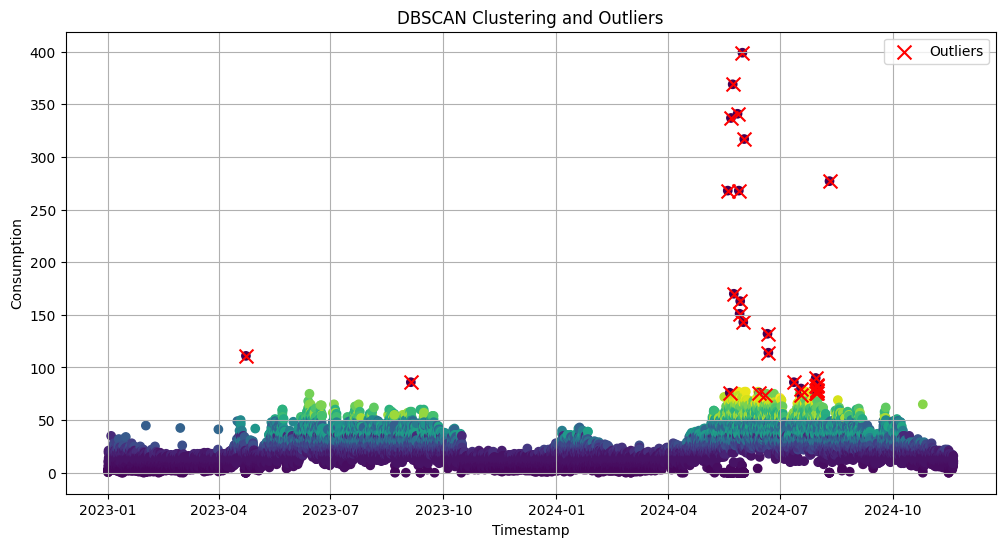

In [108]:
# Plot the data points
plt.figure(figsize=(12, 6))
plt.scatter(
    consumer_df.index,  # X-axis: timestamp or index
    consumer_df['hourly'],  # Y-axis: consumption values
    c=consumer_df['dbscan_labels'],  # Color by DBSCAN label
    cmap='viridis',  # Color map for clusters
    marker='o'
)

# Highlight outliers
outliers = consumer_df[consumer_df['dbscan_labels'] == -1]
plt.scatter(
    outliers.index,
    outliers['hourly'],
    color='red',
    label='Outliers',
    marker='x',
    s=100  # Size of the outlier marker
)

plt.title('DBSCAN Clustering and Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.legend()
plt.grid()
plt.show()


In [109]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Example data
X = consumer_df[[
    'hourly',
    # "hourly_to_daily_ratio",
    # "hourly_to_monthly_ratio",	
    # "daily_to_monthly_ratio"
    ]]

# Fit Nearest Neighbors model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)

# Calculate distances to k-nearest neighbors
distances, _ = knn.kneighbors(X)

# Average distance to the neighbors
avg_distances = distances.mean(axis=1)

# Define threshold for anomalies
threshold = avg_distances.mean() + 2 * avg_distances.std()
# anomalies = 
consumer_df['KNN_outliers(hourly)']= (avg_distances > threshold)
print(f"Number of anomalies: {len(consumer_df[consumer_df['KNN_outliers(hourly)']])}")
consumer_df[consumer_df['KNN_outliers(hourly)']]


Number of anomalies: 19


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly)
timestamp,,,,,,,,,
2023-04-23 07:00:00,111.0,295.0,10885.6,0.376271,0.010197,0.027100,-1,-1,True
2023-09-04 12:00:00,86.0,838.0,19316.0,0.102625,0.004452,0.043384,-1,-1,True
2024-05-19 09:00:00,268.0,1028.0,26868.0,0.260700,0.009975,0.038261,-1,-1,True
2024-05-21 23:00:00,337.0,1050.0,26868.0,0.320952,0.012543,0.039080,-1,-1,True
2024-05-23 09:00:00,369.0,1037.0,26868.0,0.355834,0.013734,0.038596,-1,-1,True
2024-05-24 07:00:00,170.0,1040.0,26868.0,0.163462,0.006327,0.038708,-1,-1,True
2024-05-27 08:00:00,341.0,1178.0,26868.0,0.289474,0.012692,0.043844,-1,-1,True
2024-05-28 09:00:00,268.0,1135.0,26868.0,0.236123,0.009975,0.042244,-1,-1,True
2024-05-29 00:00:00,151.0,1216.0,26868.0,0.124178,0.005620,0.045258,-1,-1,True


In [110]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Example data
X = consumer_df[[
    # 'hourly',
    "hourly_to_daily_ratio",
    "hourly_to_monthly_ratio",	
    # "daily_to_monthly_ratio"
    ]]

# Fit Nearest Neighbors model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)

# Calculate distances to k-nearest neighbors
distances, _ = knn.kneighbors(X)

# Average distance to the neighbors
avg_distances = distances.mean(axis=1)

# Define threshold for anomalies
threshold = avg_distances.mean() + 2 * avg_distances.std()
# anomalies = 
consumer_df['KNN_outliers']= (avg_distances > threshold)
print(f"Number of anomalies: {len(consumer_df[consumer_df['KNN_outliers']])}")
consumer_df[consumer_df['KNN_outliers']]


Number of anomalies: 25


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly),KNN_outliers
timestamp,,,,,,,,,,
2023-01-03 15:00:00,35.00,292.00,9162.32,0.119863,0.003820,0.031870,-1,6,False,True
2023-01-31 21:00:00,44.78,282.31,9162.32,0.158620,0.004887,0.030812,-1,17,False,True
2023-02-08 07:00:00,25.00,192.00,5558.22,0.130208,0.004498,0.034543,-1,13,False,True
2023-02-28 21:00:00,42.51,227.25,5558.22,0.187063,0.007648,0.040885,-1,18,False,True
2023-03-02 11:00:00,26.00,207.00,7069.39,0.125604,0.003678,0.029281,-1,14,False,True
2023-03-31 21:00:00,41.20,280.56,7069.39,0.146849,0.005828,0.039687,-1,19,False,True
2023-04-23 07:00:00,111.00,295.00,10885.60,0.376271,0.010197,0.027100,-1,-1,True,True
2023-04-30 21:00:00,41.94,371.16,10885.60,0.112997,0.003853,0.034096,-1,31,False,True
2023-09-12 07:00:00,60.00,469.00,19316.00,0.127932,0.003106,0.024280,-1,38,False,True


In [111]:
from scipy.stats import zscore

consumer_df['z_hourly'] = zscore(consumer_df['hourly'])
consumer_df['z_daily'] = zscore(consumer_df['daily'])
consumer_df['z_monthly'] = zscore(consumer_df['monthly'])
consumer_df['combined_z'] = (consumer_df['z_hourly'] + consumer_df['z_daily'] + consumer_df['z_monthly']) / 3

print(f"no of namolis: {len(consumer_df[abs(consumer_df['combined_z']) > 3])}")
consumer_df[abs(consumer_df['combined_z']) > 3]


no of namolis: 14


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly),KNN_outliers,z_hourly,z_daily,z_monthly,combined_z
timestamp,,,,,,,,,,,,,,
2024-05-19 09:00:00,268.0,1028.0,26868.0,0.260700,0.009975,0.038261,-1,-1,True,True,15.913439,1.913167,1.495373,6.440660
2024-05-21 23:00:00,337.0,1050.0,26868.0,0.320952,0.012543,0.039080,-1,-1,True,True,20.360486,1.993818,1.495373,7.949892
2024-05-23 09:00:00,369.0,1037.0,26868.0,0.355834,0.013734,0.038596,-1,-1,True,True,22.422884,1.946161,1.495373,8.621473
2024-05-24 07:00:00,170.0,1040.0,26868.0,0.163462,0.006327,0.038708,-1,-1,True,True,9.597343,1.957159,1.495373,4.349958
2024-05-27 08:00:00,341.0,1178.0,26868.0,0.289474,0.012692,0.043844,-1,-1,True,True,20.618285,2.463058,1.495373,8.192239
2024-05-28 09:00:00,268.0,1135.0,26868.0,0.236123,0.009975,0.042244,-1,-1,True,True,15.913439,2.305422,1.495373,6.571411
2024-05-29 00:00:00,151.0,1216.0,26868.0,0.124178,0.005620,0.045258,-1,-1,True,True,8.372794,2.602363,1.495373,4.156843
2024-05-29 12:00:00,163.0,1216.0,26868.0,0.134046,0.006067,0.045258,-1,-1,True,True,9.146193,2.602363,1.495373,4.414643
2024-05-31 07:00:00,399.0,1078.0,26868.0,0.370130,0.014850,0.040122,-1,-1,True,True,24.356383,2.096464,1.495373,9.316073


In [113]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

data = consumer_df[['hourly', 
           'daily',
        #  'monthly'
           ]].values
cov_matrix = np.cov(data, rowvar=False)
inv_cov_matrix = inv(cov_matrix)
mean = np.mean(data, axis=0)

consumer_df['mahalanobis'] = [mahalanobis(row, mean, inv_cov_matrix) for row in data]
threshold = np.percentile(consumer_df['mahalanobis'], 99.6)  # Set a threshold
print(f"no of anamolies: {len(consumer_df[consumer_df['mahalanobis'] > threshold])}")
consumer_df[consumer_df['mahalanobis'] > threshold].tail(60)


no of anamolies: 67


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly),KNN_outliers,z_hourly,z_daily,z_monthly,combined_z,mahalanobis
timestamp,,,,,,,,,,,,,,,
2024-05-19 09:00:00,268.0,1028.0,26868.0,0.260700,0.009975,0.038261,-1,-1,True,True,15.913439,1.913167,1.495373,6.440660,21.403214
2024-05-21 18:00:00,0.0,1050.0,26868.0,0.000000,0.000000,0.039080,1,0,False,False,-1.359150,1.993818,1.495373,0.710014,4.596881
2024-05-21 19:00:00,0.0,1050.0,26868.0,0.000000,0.000000,0.039080,1,0,False,False,-1.359150,1.993818,1.495373,0.710014,4.596881
2024-05-21 20:00:00,0.0,1050.0,26868.0,0.000000,0.000000,0.039080,1,0,False,False,-1.359150,1.993818,1.495373,0.710014,4.596881
2024-05-21 21:00:00,0.0,1050.0,26868.0,0.000000,0.000000,0.039080,1,0,False,False,-1.359150,1.993818,1.495373,0.710014,4.596881
2024-05-21 22:00:00,0.0,1050.0,26868.0,0.000000,0.000000,0.039080,1,0,False,False,-1.359150,1.993818,1.495373,0.710014,4.596881
2024-05-21 23:00:00,337.0,1050.0,26868.0,0.320952,0.012543,0.039080,-1,-1,True,True,20.360486,1.993818,1.495373,7.949892,27.834793
2024-05-23 02:00:00,0.0,1037.0,26868.0,0.000000,0.000000,0.038596,1,0,False,False,-1.359150,1.946161,1.495373,0.694128,4.530051
2024-05-23 03:00:00,0.0,1037.0,26868.0,0.000000,0.000000,0.038596,1,0,False,False,-1.359150,1.946161,1.495373,0.694128,4.530051


In [114]:
consumer_df['hourly'].loc["2024-07-30"]

timestamp
2024-07-30 00:00:00    77.0
2024-07-30 01:00:00    76.0
2024-07-30 02:00:00    73.0
2024-07-30 03:00:00    66.0
2024-07-30 04:00:00    61.0
2024-07-30 05:00:00    54.0
2024-07-30 06:00:00    39.0
2024-07-30 07:00:00    41.0
2024-07-30 08:00:00    42.0
2024-07-30 09:00:00    37.0
2024-07-30 10:00:00    27.0
2024-07-30 11:00:00    29.0
2024-07-30 12:00:00    38.0
2024-07-30 13:00:00    42.0
2024-07-30 14:00:00    54.0
2024-07-30 15:00:00    60.0
2024-07-30 16:00:00    62.0
2024-07-30 17:00:00    55.0
2024-07-30 18:00:00    47.0
2024-07-30 19:00:00    57.0
2024-07-30 20:00:00    70.0
2024-07-30 21:00:00    79.0
2024-07-30 22:00:00    82.0
2024-07-30 23:00:00    83.0
Name: hourly, dtype: float64

In [115]:
from keras.models import Sequential
from keras.layers import Dense

# Prepare data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(consumer_df[['hourly', 'daily', 'monthly']])

# Build Autoencoder
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

# Reconstruction Error
reconstructions = model.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)
consumer_df['reconstruction_error'] = mse

threshold = np.percentile(mse, 95)  # Set anomaly threshold
print(f"no of anamolies: {len(consumer_df[consumer_df['reconstruction_error'] > threshold])}")
consumer_df[consumer_df['reconstruction_error'] > threshold]

Epoch 1/50
465/465 [==============================] - 1s 1ms/step - loss: 0.0046 - val_loss: 1.6208e-05
Epoch 2/50
465/465 [==============================] - 1s 1ms/step - loss: 2.3421e-06 - val_loss: 6.9124e-06
Epoch 3/50
465/465 [==============================] - 0s 1ms/step - loss: 1.1611e-06 - val_loss: 5.4684e-06
Epoch 4/50
465/465 [==============================] - 1s 1ms/step - loss: 9.1487e-07 - val_loss: 3.8364e-06
Epoch 5/50
465/465 [==============================] - 0s 1ms/step - loss: 1.2645e-06 - val_loss: 4.9684e-06
Epoch 6/50
465/465 [==============================] - 1s 1ms/step - loss: 6.9905e-07 - val_loss: 4.0218e-06
Epoch 7/50
465/465 [==============================] - 0s 1ms/step - loss: 7.8001e-07 - val_loss: 6.0640e-06
Epoch 8/50
465/465 [==============================] - 1s 1ms/step - loss: 2.3831e-06 - val_loss: 4.6384e-06
Epoch 9/50
465/465 [==============================] - 0s 1ms/step - loss: 8.3372e-07 - val_loss: 4.6450e-06
Epoch 10/50
465/465 [===========

,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly),KNN_outliers,z_hourly,z_daily,z_monthly,combined_z,mahalanobis,reconstruction_error
timestamp,,,,,,,,,,,,,,,,
2023-02-28 21:00:00,42.51,227.25,5558.22,0.187063,0.007648,0.040885,-1,18,False,True,1.380618,-1.022330,-1.275766,-0.305826,3.290973,0.000090
2023-04-18 23:00:00,48.00,649.00,10885.60,0.073960,0.004409,0.059620,-1,27,False,False,1.734448,0.523778,-0.582990,0.558412,2.052183,0.000035
2023-04-23 07:00:00,111.00,295.00,10885.60,0.376271,0.010197,0.027100,-1,-1,True,True,5.794795,-0.773963,-0.582990,1.479281,9.377155,0.000323
2023-05-22 22:00:00,56.00,837.00,15728.58,0.066906,0.003560,0.053215,-1,37,False,False,2.250048,1.212974,0.046795,1.169939,2.339062,0.000039
2023-05-22 23:00:00,60.00,837.00,15728.58,0.071685,0.003815,0.053215,-1,38,False,False,2.507848,1.212974,0.046795,1.255872,2.670096,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11 19:00:00,15.00,303.00,5345.00,0.049505,0.002806,0.056688,1,2,False,False,-0.392401,-0.744635,-1.303493,-0.813510,0.777822,0.000046
2024-11-11 20:00:00,13.00,303.00,5345.00,0.042904,0.002432,0.056688,1,2,False,False,-0.521300,-0.744635,-1.303493,-0.856476,0.745458,0.000046
2024-11-11 21:00:00,12.00,303.00,5345.00,0.039604,0.002245,0.056688,1,2,False,False,-0.585750,-0.744635,-1.303493,-0.877960,0.746960,0.000046


In [119]:

threshold = np.percentile(mse, 99.7)  # Set anomaly threshold
print(f"no of anamolies: {len(consumer_df[consumer_df['reconstruction_error'] > threshold])}")
consumer_df[consumer_df['reconstruction_error'] > threshold]

no of anamolies: 48


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly),KNN_outliers,z_hourly,z_daily,z_monthly,combined_z,mahalanobis,reconstruction_error
timestamp,,,,,,,,,,,,,,,,
2023-04-23 07:00:00,111.0,295.0,10885.6,0.376271,0.010197,0.027100,-1,-1,True,True,5.794795,-0.773963,-0.582990,1.479281,9.377155,0.000323
2024-05-19 09:00:00,268.0,1028.0,26868.0,0.260700,0.009975,0.038261,-1,-1,True,True,15.913439,1.913167,1.495373,6.440660,21.403214,0.000834
2024-05-21 23:00:00,337.0,1050.0,26868.0,0.320952,0.012543,0.039080,-1,-1,True,True,20.360486,1.993818,1.495373,7.949892,27.834793,0.001349
2024-05-23 09:00:00,369.0,1037.0,26868.0,0.355834,0.013734,0.038596,-1,-1,True,True,22.422884,1.946161,1.495373,8.621473,30.905496,0.001442
2024-05-24 07:00:00,170.0,1040.0,26868.0,0.163462,0.006327,0.038708,-1,-1,True,True,9.597343,1.957159,1.495373,4.349958,12.150752,0.000256
2024-05-27 08:00:00,341.0,1178.0,26868.0,0.289474,0.012692,0.043844,-1,-1,True,True,20.618285,2.463058,1.495373,8.192239,27.746596,0.001369
2024-05-28 09:00:00,268.0,1135.0,26868.0,0.236123,0.009975,0.042244,-1,-1,True,True,15.913439,2.305422,1.495373,6.571411,21.022239,0.000789
2024-05-29 00:00:00,151.0,1216.0,26868.0,0.124178,0.005620,0.045258,-1,-1,True,True,8.372794,2.602363,1.495373,4.156843,9.849012,0.000219
2024-05-29 12:00:00,163.0,1216.0,26868.0,0.134046,0.006067,0.045258,-1,-1,True,True,9.146193,2.602363,1.495373,4.414643,10.948848,0.000249


In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(consumer_df['hourly'], model='additive', period=24)
consumer_df["residual"] = decomposition.resid
print(f"no of namolies: {len(consumer_df['residual'][abs(consumer_df['residual']) > 3 * consumer_df['residual'].std()])}")
consumer_df[abs(consumer_df["residual"]) > 3 * consumer_df["residual"].std()]


no of namolies: 86


,hourly,daily,monthly,hourly_to_daily_ratio,hourly_to_monthly_ratio,daily_to_monthly_ratio,isolation_forest,dbscan_labels,KNN_outliers(hourly),KNN_outliers,z_hourly,z_daily,z_monthly,combined_z,mahalanobis,reconstruction_error,residual
timestamp,,,,,,,,,,,,,,,,,
2023-01-31 21:00:00,44.78,282.31,9162.32,0.158620,0.004887,0.030812,-1,17,False,True,1.526919,-0.820483,-0.807086,-0.033550,3.231757,0.000015,31.672145
2023-02-28 21:00:00,42.51,227.25,5558.22,0.187063,0.007648,0.040885,-1,18,False,True,1.380618,-1.022330,-1.275766,-0.305826,3.290973,0.000090,31.401520
2023-04-16 07:00:00,49.00,485.00,10885.60,0.101031,0.004501,0.044554,-1,20,False,False,1.798898,-0.077435,-0.582990,0.379491,2.726936,0.000023,30.314537
2023-04-23 07:00:00,111.00,295.00,10885.60,0.376271,0.010197,0.027100,-1,-1,True,True,5.794795,-0.773963,-0.582990,1.479281,9.377155,0.000323,99.772870
2023-08-05 11:00:00,62.00,747.00,21800.00,0.082999,0.002844,0.034266,1,45,False,False,2.636747,0.883040,0.836326,1.452038,3.053536,0.000037,35.699793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-10 01:00:00,0.00,817.00,23775.00,0.000000,0.000000,0.034364,1,0,False,False,-1.359150,1.139655,1.093157,0.291221,3.418432,0.000002,-35.087381
2024-08-10 02:00:00,0.00,817.00,23775.00,0.000000,0.000000,0.034364,1,0,False,False,-1.359150,1.139655,1.093157,0.291221,3.418432,0.000002,-33.874281
2024-08-10 03:00:00,0.00,817.00,23775.00,0.000000,0.000000,0.034364,1,0,False,False,-1.359150,1.139655,1.093157,0.291221,3.418432,0.000002,-32.039715


In [123]:
decomposition.resid

timestamp
2023-01-01 00:00:00   NaN
2023-01-01 01:00:00   NaN
2023-01-01 02:00:00   NaN
2023-01-01 03:00:00   NaN
2023-01-01 04:00:00   NaN
                       ..
2024-11-18 19:00:00   NaN
2024-11-18 20:00:00   NaN
2024-11-18 21:00:00   NaN
2024-11-18 22:00:00   NaN
2024-11-18 23:00:00   NaN
Name: resid, Length: 16512, dtype: float64